# Introduction

In this notebook I try to better understand what ICA (Independent Component Analysis) is good for and how it differs from PCA:

"ICA", from Wikipedia:

    In signal processing, independent component analysis (ICA) is a computational method for separating a multivariate signal into additive subcomponents. This is done by assuming that at most one subcomponent is Gaussian and that the subcomponents are statistically independent from each other.[1] ICA is a special case of blind source separation. A common example application is the "cocktail party problem" of listening in on one person's speech in a noisy room.[2]
    
"PCA", from Wikipedia:

    Principal component analysis (PCA) is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data. Formally, PCA is a statistical technique for reducing the dimensionality of a dataset. This is accomplished by linearly transforming the data into a new coordinate system where (most of) the variation in the data can be described with fewer dimensions than the initial data. Many studies use the first two principal components in order to plot the data in two dimensions and to visually identify clusters of closely related data points.

# A first simple code example (time series reconstruction)

/home/juebrauer/prg/miniconda3/envs/e1/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


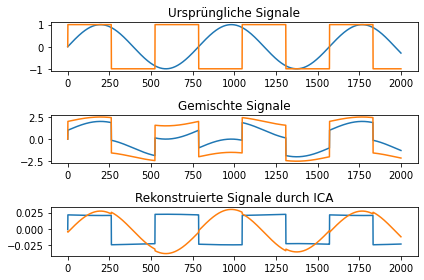

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Erzeuge zwei unabhängige Signale
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Sinussignal
s2 = np.sign(np.sin(3 * time))  # Quadratsignal

# Staple die Signale in einer Matrix
# column_stack : Stack 1-D arrays as columns into a 2-D array.
S = np.c_[s1, s2]

# Mische die Signale
A = np.array([[1, 1], [0.5, 2]])  # Mischmatrix
X = np.dot(S, A.T)  # Gemischte Signale

# Führe ICA durch
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X)  # Rekonstruierte Signale

# Plotten
plt.figure()

# Ursprüngliche Signale
plt.subplot(3, 1, 1)
plt.plot(S)
plt.title("Ursprüngliche Signale")

# Gemischte Signale
plt.subplot(3, 1, 2)
plt.plot(X)
plt.title("Gemischte Signale")

# Rekonstruierte Signale
plt.subplot(3, 1, 3)
plt.plot(S_)
plt.title("Rekonstruierte Signale durch ICA")

plt.tight_layout()
plt.show()


In [3]:
s1.shape

(2000,)

In [5]:
s1[:50]

array([0.        , 0.00800392, 0.01600732, 0.0240097 , 0.03201054,
       0.04000933, 0.04800555, 0.05599871, 0.06398827, 0.07197373,
       0.07995459, 0.08793032, 0.09590041, 0.10386437, 0.11182167,
       0.11977181, 0.12771427, 0.13564855, 0.14357414, 0.15149054,
       0.15939722, 0.1672937 , 0.17517946, 0.183054  , 0.19091681,
       0.19876739, 0.20660523, 0.21442984, 0.22224071, 0.23003735,
       0.23781924, 0.24558591, 0.25333683, 0.26107153, 0.26878951,
       0.27649026, 0.2841733 , 0.29183814, 0.29948428, 0.30711123,
       0.31471851, 0.32230563, 0.3298721 , 0.33741743, 0.34494115,
       0.35244277, 0.35992182, 0.3673778 , 0.37481025, 0.38221869])

In [4]:
s2.shape

(2000,)

In [6]:
s2[:50]

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
S.shape

(2000, 2)

In [11]:
S[:10]

array([[0.        , 0.        ],
       [0.00800392, 1.        ],
       [0.01600732, 1.        ],
       [0.0240097 , 1.        ],
       [0.03201054, 1.        ],
       [0.04000933, 1.        ],
       [0.04800555, 1.        ],
       [0.05599871, 1.        ],
       [0.06398827, 1.        ],
       [0.07197373, 1.        ]])

In [7]:
A

array([[1. , 1. ],
       [0.5, 2. ]])

In [8]:
A.T

array([[1. , 0.5],
       [1. , 2. ]])

In [12]:
np.dot(S, A.T)

array([[ 0.        ,  0.        ],
       [ 1.00800392,  2.00400196],
       [ 1.01600732,  2.00800366],
       ...,
       [-1.27253687, -2.13626843],
       [-1.28022907, -2.14011453],
       [-1.28790332, -2.14395166]])

In [13]:
X

array([[ 0.        ,  0.        ],
       [ 1.00800392,  2.00400196],
       [ 1.01600732,  2.00800366],
       ...,
       [-1.27253687, -2.13626843],
       [-1.28022907, -2.14011453],
       [-1.28790332, -2.14395166]])

In [14]:
X.shape

(2000, 2)

In [15]:
S_.shape

(2000, 2)

In [17]:
S_

array([[-0.00092699, -0.00391382],
       [ 0.02150296, -0.00493301],
       [ 0.02149534, -0.00467282],
       ...,
       [-0.02310509, -0.01149449],
       [-0.02309777, -0.01174456],
       [-0.02309046, -0.01199405]])

In [18]:
S

array([[ 0.        ,  0.        ],
       [ 0.00800392,  1.        ],
       [ 0.01600732,  1.        ],
       ...,
       [-0.27253687, -1.        ],
       [-0.28022907, -1.        ],
       [-0.28790332, -1.        ]])

# A second code example (computer vision / faces)

/home/juebrauer/prg/miniconda3/envs/e1/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


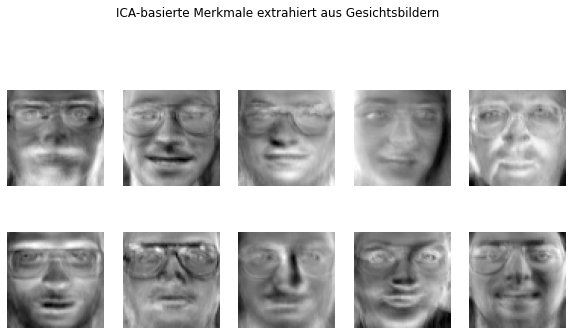

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import FastICA

# Lade den Olivetti Gesichter-Datensatz
dataset = fetch_olivetti_faces(shuffle=True, random_state=0)
faces = dataset.data

n_faces = 10  # Anzahl der Gesichter, die wir anzeigen möchten
n_components = 64  # Anzahl der unabhängigen Komponenten, die wir extrahieren möchten

# Führe ICA durch
ica = FastICA(n_components=n_components, random_state=0)
ica_faces = ica.fit_transform(faces)

# Transformiere die ICA-Komponenten zurück in das ursprüngliche Merkmalsformat
ica_components = ica.mixing_

# Plot
plt.figure(figsize=(10, 10))

for i in range(n_faces):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(ica_components[:, i].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')

plt.suptitle('ICA-basierte Merkmale extrahiert aus Gesichtsbildern')
plt.show()

In [22]:
faces.shape

(400, 4096)

In [23]:
import math
math.sqrt(4096)

64.0

In [24]:
64*64

4096

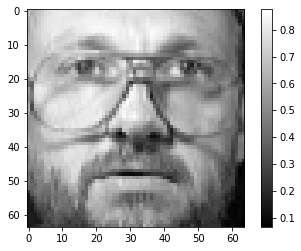

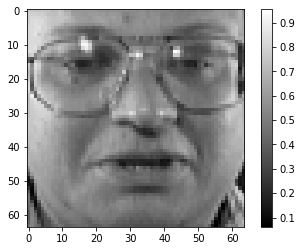

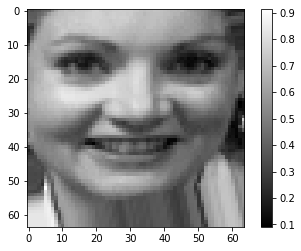

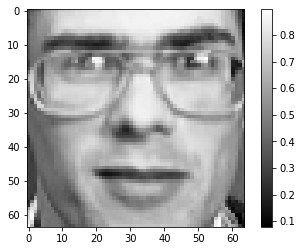

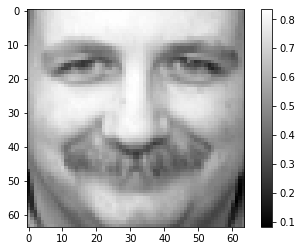

In [29]:
for i in range(5):
    plt.imshow(faces[i].reshape(64,64), cmap="gray")
    plt.colorbar()
    plt.show()

In [30]:
ica_faces.shape

(400, 64)

# PCA vs. ICA

Here is a code example to show the differences between PCA and ICA.

/home/juebrauer/prg/miniconda3/envs/e1/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


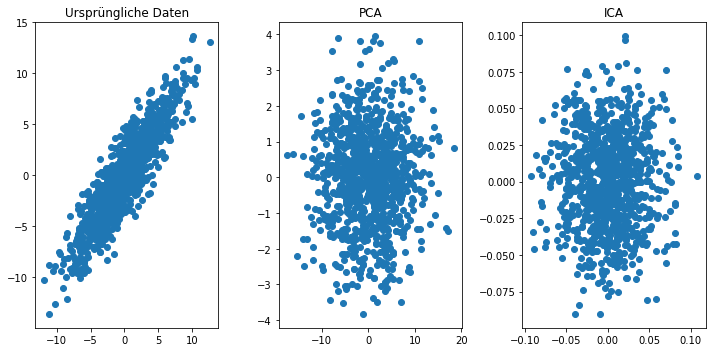

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA

# Erstelle einen Datensatz
np.random.seed(0)
X = np.random.normal(size=(1000, 2))
X[:, 0] *= 4  # Vergrößere die Varianz des ersten Features
X = np.dot(X, [[1, 1], [0, 2]])  # Füge eine Abhängigkeit zwischen den Features hinzu

# Führe PCA durch
pca = PCA()
X_pca = pca.fit_transform(X)

# Führe ICA durch
ica = FastICA()
X_ica = ica.fit_transform(X)

# Plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Ursprüngliche Daten")

plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("PCA")

plt.subplot(1, 3, 3)
plt.scatter(X_ica[:, 0], X_ica[:, 1])
plt.title("ICA")

plt.tight_layout()
plt.show()

In [34]:
X.shape

(1000, 2)

In [35]:
X_pca.shape

(1000, 2)

In [36]:
X_ica.shape

(1000, 2)